## Exchange Rate TWI Time series forecasting

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
edata = pd.read_csv('exchange-rate-twi.csv')
edata.head()

,Month,Exchange Rate TWI
0,1,100.0
1,2,99.6
2,3,99.4
3,4,99.1
4,5,99.2


In [3]:
edata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              304 non-null    int64  
 1   Exchange Rate TWI  304 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.9 KB


In [4]:
edata = edata.set_index('Month')
edata.head(12)

,Exchange Rate TWI
Month,
1,100.0
2,99.6
3,99.4
4,99.1
5,99.2
6,99.2
7,99.2
8,99.3
9,100.0


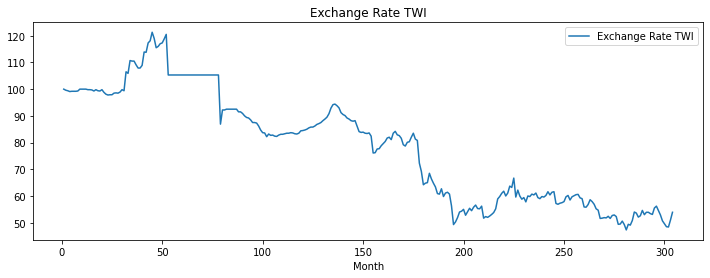

In [5]:
edata.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Exchange Rate TWI')
plt.show(block=False)

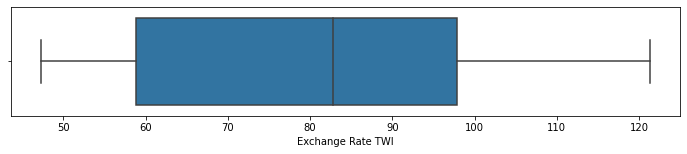

In [6]:
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=edata['Exchange Rate TWI'],whis=1.5)

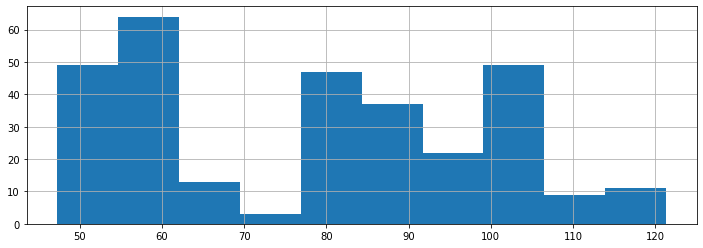

In [7]:
fig = edata['Exchange Rate TWI'].hist(figsize = (12,4))

No missing values or outliers detected. Hence, can conclude the dataset is clean

### Train-Test split

In [8]:
train_ln = 212
etrain = edata[0:train_ln] # first 212 months as training set
etest = edata[train_ln:] # last 92 months as out-of-time test set

In [9]:
y_ht_avg = etest.copy()
y_ht_avg['avg_forecast'] = etrain['Exchange Rate TWI'].mean()

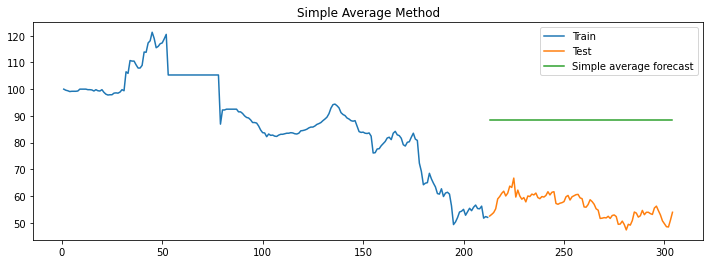

In [10]:
# Plot train, test and forecast 
plt.figure(figsize=(12,4))
plt.plot(etrain['Exchange Rate TWI'], label='Train')
plt.plot(etest['Exchange Rate TWI'], label='Test')
plt.plot(y_ht_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [11]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(etest['Exchange Rate TWI'], y_ht_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(etest['Exchange Rate TWI']-y_ht_avg['avg_forecast'])/etest['Exchange Rate TWI'])*100,2)

eresults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
eresults = eresults[['Method', 'RMSE', 'MAPE']]
eresults

,Method,RMSE,MAPE
0,Simple average method,32.42,58.12


In [12]:
y_ht_avg['avg_forecast'].head(1)

Month
213    88.325472
Name: avg_forecast, dtype: float64

In [13]:
y_ht_naive = etest.copy()
y_ht_naive['naive_forecast'] = etrain['Exchange Rate TWI'][train_ln]

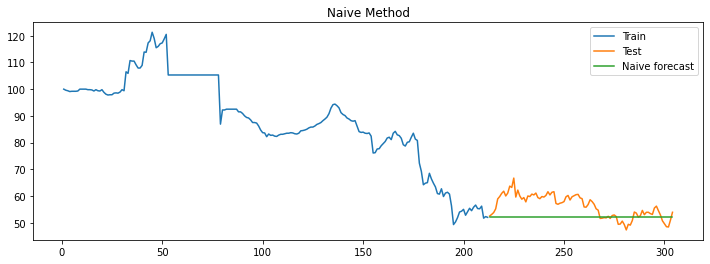

In [14]:
# Plot train, test and forecast 
plt.figure(figsize=(12,4))
plt.plot(etrain['Exchange Rate TWI'], label='Train')
plt.plot(etest['Exchange Rate TWI'], label='Test')
plt.plot(y_ht_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [15]:
rmse = np.sqrt(mean_squared_error(etest['Exchange Rate TWI'], y_ht_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(etest['Exchange Rate TWI']-y_ht_naive['naive_forecast'])/etest['Exchange Rate TWI'])*100,2)

etempresults = pd.DataFrame({'Method':['Naive method'], 'RMSE': [rmse],'MAPE': [mape] })
eresults = pd.concat([eresults, etempresults])
eresults = eresults[['Method', 'RMSE', 'MAPE']]
eresults

,Method,RMSE,MAPE
0,Simple average method,32.42,58.12
0,Naive method,5.98,8.41


In [16]:
y_ht_naive['naive_forecast'].head()

Month
213    52.0
214    52.0
215    52.0
216    52.0
217    52.0
Name: naive_forecast, dtype: float64

In [17]:
etrain['Exchange Rate TWI'].tail(1)

Month
212    52.0
Name: Exchange Rate TWI, dtype: float64

In [18]:
y_ht_sma = edata.copy()
ma_window = 6
y_ht_sma['sma_forecast'] = edata['Exchange Rate TWI'].rolling(ma_window).mean()
y_ht_sma['sma_forecast'][train_ln:] = y_ht_sma['sma_forecast'][train_ln-1]

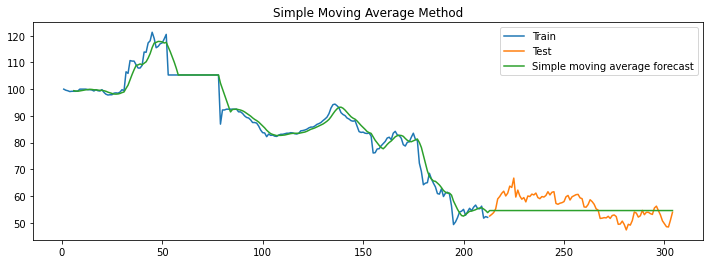

In [19]:
# plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(etrain['Exchange Rate TWI'], label='Train')
plt.plot(etest['Exchange Rate TWI'], label='Test')
plt.plot(y_ht_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [20]:
rmse = np.sqrt(mean_squared_error(etest['Exchange Rate TWI'], y_ht_sma['sma_forecast'][train_ln:])).round(2)
mape = np.round(np.mean(np.abs(etest['Exchange Rate TWI']-y_ht_sma['sma_forecast'][train_ln:])/etest['Exchange Rate TWI'])*100,2)

etempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
eresults = pd.concat([eresults, etempResults])
eresults = eresults[['Method', 'RMSE', 'MAPE']]
eresults

,Method,RMSE,MAPE
0,Simple average method,32.42,58.12
0,Naive method,5.98,8.41
0,Simple moving average forecast,4.58,6.90


In [21]:
y_ht_sma['sma_forecast'][train_ln:].head()

Month
213    54.55
214    54.55
215    54.55
216    54.55
217    54.55
Name: sma_forecast, dtype: float64

## Auto Regressive methods

### Stationarity vs non-stationary time series

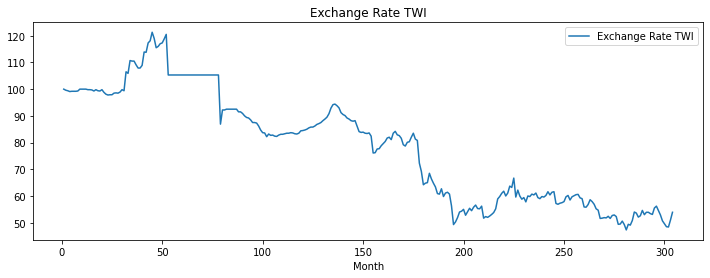

In [22]:
edata['Exchange Rate TWI'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Exchange Rate TWI')
plt.show(block=False)

### Augmented Dickey-Fuller (ADF) test

In [23]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(edata['Exchange Rate TWI'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -0.805468
Critical Values @ 0.05: -2.87
p-value: 0.817511


p-value > 0.05, the data is not stationary  
  
### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [24]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(edata['Exchange Rate TWI'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 1.725897
Critical Values @ 0.05: 0.46
p-value: 0.010000


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


p-value < 0.05, the data is not stationary

### Box Cox transformation to make variance constant

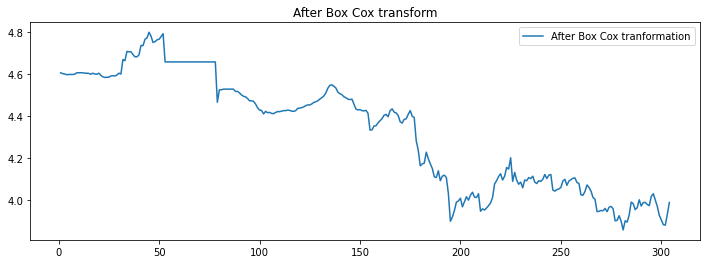

In [25]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(edata['Exchange Rate TWI'], lmbda=0), index = edata.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

### Differencing to remove trend

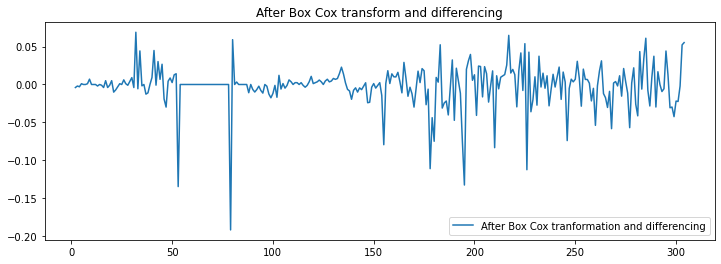

In [26]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), edata.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [27]:
data_boxcox_diff.dropna(inplace=True)

In [28]:
data_boxcox_diff.tail()

Month
300   -0.021935
301   -0.022427
302   -0.002064
303    0.052326
304    0.055305
dtype: float64

### Augmented Dickey-Fuller (ADF) test

In [29]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -17.326930
Critical Values @ 0.05: -2.87
p-value: 0.000000


P-Value<0.05, the data is stationary  
  
### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test¶

In [30]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.076853
Critical Values @ 0.05: 0.46
p-value: 0.100000


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


P-Value>0.05, the data is stationary

### Autocorrelation function (ACF)

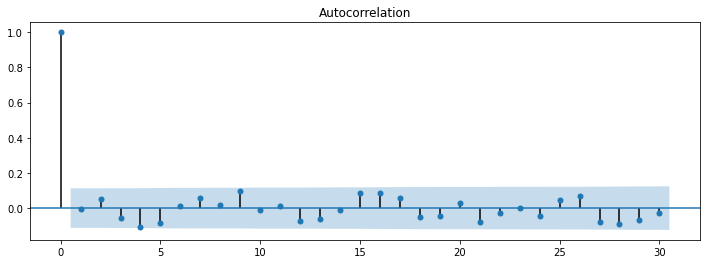

In [31]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

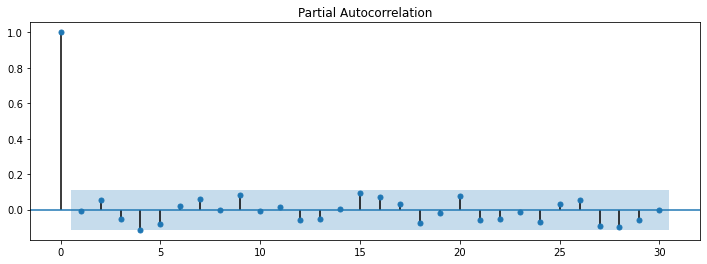

In [32]:
# PACF
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

In [34]:
train_data_boxcox = data_boxcox[:train_ln]
test_data_boxcox = data_boxcox[train_ln:]
train_data_boxcox_diff = data_boxcox_diff[:train_ln-1]
test_data_boxcox_diff = data_boxcox_diff[train_ln-1:]

In [35]:
train_data_boxcox_diff

Month
2     -0.004008
3     -0.002010
4     -0.003023
5      0.001009
6      0.000000
         ...   
208   -0.001810
209    0.017954
210   -0.083459
211    0.011539
212   -0.005753
Length: 211, dtype: float64